# Data 301 Group 11 Project
## Data Loading and Wrangling Functions

## Data Loading

### Import Package Statements

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Loading data into pd dataframes

In [81]:
StatCanCPI = []
StatCanBCHPI = []
StatCanCanadaHPI = []
CanadaPIR = []
WorldBankData = []
def loadStatCanCPI():
    StatCanCPI = pd.read_csv('./processed/preprocessed/Stat_Can_CPI_1985_to_Now.csv')
    StatCanCPI = StatCanCPI.set_index('Products and product groups 4')
    return StatCanCPI
def loadStatCanBCHPIData():
    StatCanBCHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_BC-only_1986_to_2021_May.csv')
    StatCanBCHPI = StatCanBCHPI.drop(index=[1,2],axis=0)
    return StatCanBCHPI
def loadStatCanCanadaHPIData():
    StatCanCanadaHPI = pd.read_csv('./processed/preprocessed/Stat_Can_HPI_Canada_1981_to_2021_May.csv')
    return StatCanCanadaHPI
def loadCanadaPrimeInterestRate():
    CanadaPIR = pd.read_csv('./processed/preprocessed/Canada-Prime-Rate-History.csv')
    CanadaPIR = CanadaPIR.transpose()
    CanadaPIR.columns = CanadaPIR.iloc[0]
    CanadaPIR.drop(index=CanadaPIR.index[0], axis=0, inplace=True)
    return CanadaPIR
def loadWorldBankData():
    WorldBankData = pd.read_csv('./processed/preprocessed/World Bank Data - Indicators.csv')
    WorldBankData = WorldBankData.set_index('Year')
    #WorldBankData.drop(index=WorldBankData.index[1], axis=0, inplace=True)
    return WorldBankData

In [110]:
def loadAll():
    StatCanCPI = loadStatCanCPI()
    StatCanBCHPI = loadStatCanBCHPIData()
    StatCanCanadaHPI = loadStatCanCanadaHPIData()
    CanadaPIR = loadCanadaPrimeInterestRate()
    WorldBankData = loadWorldBankData()
    dataFrames = [StatCanCPI, StatCanBCHPI, CanadaPIR, WorldBankData]
    return dataFrames
ourData = loadAll()
masterDF = ourData[0].append(ourData[3]).sort_index(axis=1).convert_dtypes(int)

In [133]:
print(masterDF.shape)
masterDF.iloc[:, masterDF.shape[1]-20:masterDF.shape[1]-1]

(31, 61)


,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
All-items,97.8,100.0,102.8,104.7,107.0,109.1,111.5,114.1,114.4,116.5,119.9,121.7,122.8,125.2,126.6,128.4,130.4,133.4,136.0
Food 5,97.4,100.0,101.7,103.8,106.4,108.9,111.8,115.7,121.4,123.1,127.7,130.8,132.4,135.5,140.5,142.6,142.7,145.3,150.2
Shelter 6,99.1,100.0,103.2,105.8,109.2,113.1,116.9,122.0,121.6,123.3,125.6,127.1,128.7,132.2,133.7,135.8,138.1,140.9,144.5
"Household operations, furnishings and equipment",98.6,100.0,100.7,101.2,101.7,102.2,103.2,104.6,107.3,108.8,110.9,113.0,114.4,116.6,119.7,121.7,121.9,123.2,123.6
Clothing and footwear,100.7,100.0,98.2,98.0,97.6,95.8,95.7,93.8,93.4,91.6,91.9,92.0,92.1,93.2,94.6,94.4,93.7,94.5,96.1
Transportation,97.3,100.0,105.2,107.7,112.0,115.2,117.1,119.5,113.1,118.0,125.6,128.1,129.0,130.4,126.5,127.9,132.9,139.1,141.5
Gasoline,100.8,100.0,106.4,117.6,132.6,139.8,146.1,164.7,135.8,148.2,177.8,182.3,183.4,183.8,153.4,144.2,161.2,181.5,170.5
Health and personal care,98.9,100.0,101.4,102.8,104.6,105.9,107.3,108.8,112.1,115.1,117.1,118.7,118.3,119.0,120.5,122.2,124.3,125.9,127.4
"Recreation, education and reading",98.4,100.0,100.8,101.1,100.8,100.6,101.8,102.2,103.1,104.0,105.3,105.9,106.2,107.4,109.4,111.3,114.0,115.3,116.8
"Alcoholic beverages, tobacco products and recreational cannabis",85.0,100.0,110.1,116.0,119.1,121.7,125.5,127.5,130.7,133.1,135.6,137.6,140.4,146.6,152.0,156.8,161.1,167.9,171.1


In [85]:
print(ourData[2].head())
#sns.barplot(data = ourData[2])

Date                          Jan-81 Feb-81 Mar-81 Apr-81 May-81 Jun-81  \
Prime Rate                     18.25  18.25  17.75  18.25   19.5   20.0   
Bank of Canada Overnight Rate  16.89  16.34  17.15  18.81  18.82  19.64   

Date                          Jul-81 Aug-81 Sep-81 Oct-81  ... Oct-20 Nov-20  \
Prime Rate                      21.0  22.75  21.25   20.0  ...   2.45   2.45   
Bank of Canada Overnight Rate  20.78  19.38  18.05  15.15  ...   0.25   0.25   

Date                          Dec-20 Jan-21 Feb-21 Mar-21 Apr-21 May-21  \
Prime Rate                      2.45   2.45   2.45   2.45   2.45   2.45   
Bank of Canada Overnight Rate   0.25   0.25   0.25   0.25   0.25   0.25   

Date                          Jun-21 Jul-21  
Prime Rate                      2.45   2.45  
Bank of Canada Overnight Rate   0.25   0.25  

[2 rows x 487 columns]


(1, 427)
<bound method NDFrame.head of   New housing price indexes  Jan-86  Feb-86  Mar-86  Apr-86  May-86  Jun-86  \
0    Total (house and land)    66.3    66.4    66.4    66.8    67.1    66.9   

   Jul-86  Aug-86  Sep-86  ...  20-Sep  20-Oct  20-Nov  20-Dec  21-Jan  \
0    66.8    66.8    67.2  ...   110.2   111.5   111.8   111.9   112.3   

   21-Feb  21-Mar  21-Apr  21-May  21-Jun  
0   116.3   117.2   118.9   120.0   119.7  

[1 rows x 427 columns]>


<AxesSubplot:>

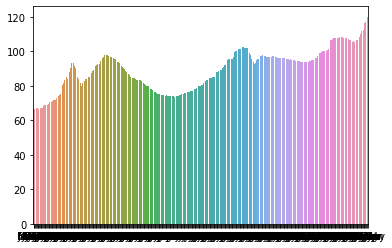

In [86]:
print(ourData[1].shape)
print(ourData[1].head())
sns.barplot(data = ourData[1])

In [ ]:
MasterDataDF = []


(15, 36)
                                                 1985  1986  1987  1988  1989  \
Products and product groups 4                                                   
All-items                                        63.0  65.6  68.5  71.2  74.8   
Food 5                                           65.5  68.8  71.8  73.7  76.5   
Shelter 6                                        65.6  67.5  70.5  73.8  78.1   
Household operations, furnishings and equipment  72.3  74.5  76.7  79.6  82.5   
Clothing and footwear                            71.5  73.4  76.5  80.5  83.7   

                                                 1990  1991  1992  1993  1994  \
Products and product groups 4                                                   
All-items                                        78.4  82.8  84.0  85.6  85.7   
Food 5                                           79.6  83.4  83.1  84.5  84.9   
Shelter 6                                        82.5  86.3  87.9  89.1  89.4   
Household operatio

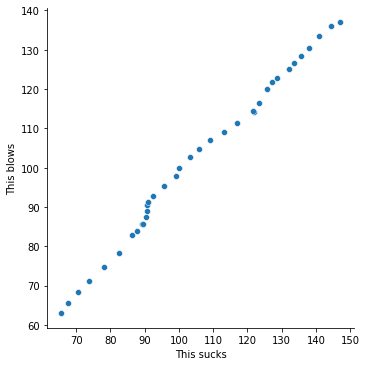

In [90]:
#Copyright Wesley Burchnall
print(ourData[0].shape)
print(ourData[0].head())
ax = sns.relplot(x='Shelter 6', y='All-items', data=ourData[0].transpose())
ax.set(xlabel="This sucks", ylabel="This blows")

In [27]:
#print(ourData[0].transpose())